In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/andrin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
art_df_full = pd.read_csv("Factiva_WSJ.csv")

art_df_full["row_id"] = art_df_full.index + 1

art_df = art_df_full[['row_id', 'TEXT']].copy()

art_df['TEXT'] = art_df['TEXT'].str.replace("[^a-zA-Z#]", " ")

art_df['TEXT'] = art_df['TEXT'].str.casefold()

art_df = art_df.fillna('')

In [3]:
results_df = pd.DataFrame()
results_df['row_id'] = ['99999999999']
results_df['sentiment_type'] = pd.NA
results_df['sentiment_score'] = 0

In [5]:
sid = SentimentIntensityAnalyzer()
t_df = results_df

for index, row in art_df.iterrows():

    #print(index)

    scores = sid.polarity_scores(row[1])

    for key, value in scores.items():

        temp = [key,value,row[0]]

        results_df['row_id'] = row[0]
        results_df['sentiment_type'] = key
        results_df['sentiment_score'] = value

        t_df = pd.concat([t_df, results_df], ignore_index=True)

t_df_cleaned = t_df[t_df.row_id != '99999999999']

t_df_cleaned = t_df_cleaned.drop_duplicates()

t_df_cleaned = t_df[t_df.sentiment_type == 'compound']

In [6]:
article_scores_df = pd.merge(art_df_full, t_df_cleaned, on='row_id', how='inner')

article_scores_df = article_scores_df.drop('sentiment_type', axis=1)

bank_phrase_scores = pd.read_csv("elon_phrase_scores.csv")

article_scores_df = pd.merge(article_scores_df, bank_phrase_scores, on='row_id', how='inner')

article_scores_df['YEAR'] = article_scores_df['DATE'].str.slice(0,4)

article_scores_df = article_scores_df.drop('row_id', axis=1)

article_scores_df = article_scores_df.dropna(subset=['TEXT'])

article_scores_df.to_csv("elon_sentiment_score.csv", encoding='utf-8', index=False)


In [7]:
article_scores_df[["sentiment_score"]].describe()
article_scores_df[["phrase_score"]].describe()

,phrase_score
count,3351.000000
mean,0.171735
std,0.715303
min,-0.999900
25%,-0.576350
50%,0.290100
75%,0.876800
max,0.999600


<Axes: title={'center': 'Sentiment Score'}, xlabel='Period', ylabel='Mean Sentiment Score'>

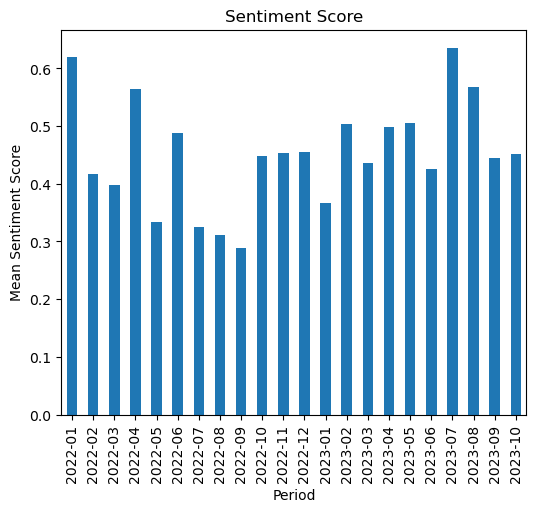

In [16]:
article_scores_df['YEAR_MONTH'] = article_scores_df['DATE'].str[:7]
article_scores_df = article_scores_df[article_scores_df['DATE'] != '0350-01-08']


#generate mean of sentiment_score by period
dfg = article_scores_df.groupby(['YEAR_MONTH'])['sentiment_score'].mean()
#create a bar plot
dfg.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='Period', figsize=(6, 5))

<Axes: title={'center': 'Phrase Score'}, xlabel='Period', ylabel='Mean Phrase Score'>

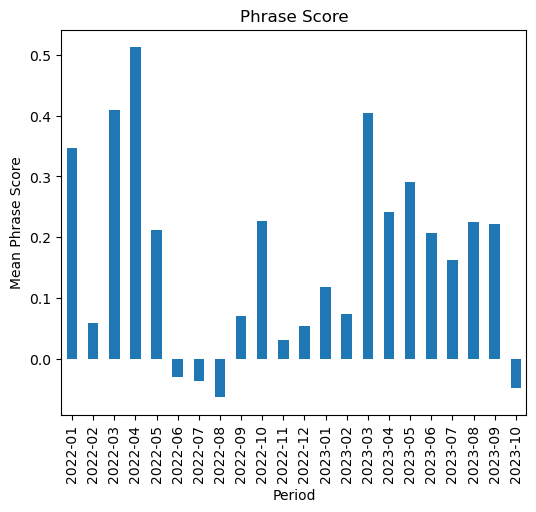

In [17]:
#generate mean of sentiment_score by period
dfg = article_scores_df.groupby(['YEAR_MONTH'])['phrase_score'].mean()
#create a bar plot
dfg.plot(kind='bar', title='Phrase Score', ylabel='Mean Phrase Score',
         xlabel='Period', figsize=(6, 5))

<AxesSubplot:title={'center':'Sentiment Score'}, xlabel='BANK', ylabel='Mean Sentiment Score'>

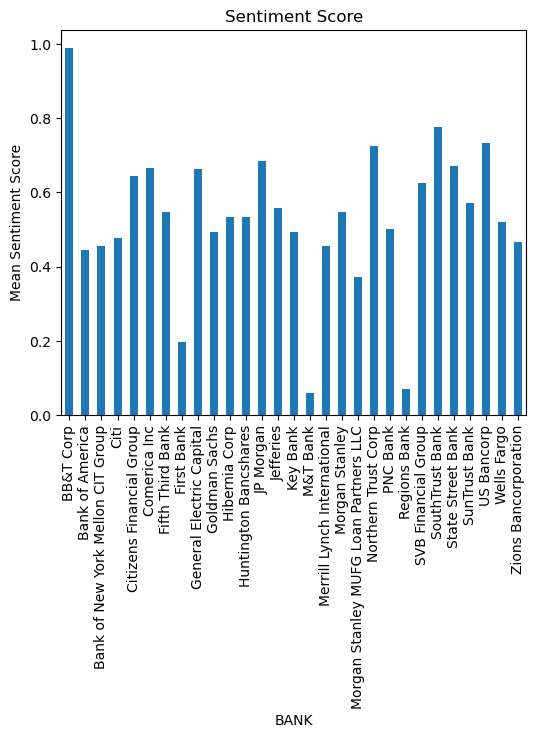

In [69]:
#generate mean of sentiment_score by period
dfg = article_scores_df.groupby(['BANK'])['sentiment_score'].mean()
#create a bar plot
dfg.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='BANK', figsize=(6, 5))

<AxesSubplot:title={'center':'Phrase Score'}, xlabel='BANK', ylabel='Mean Phrase Score'>

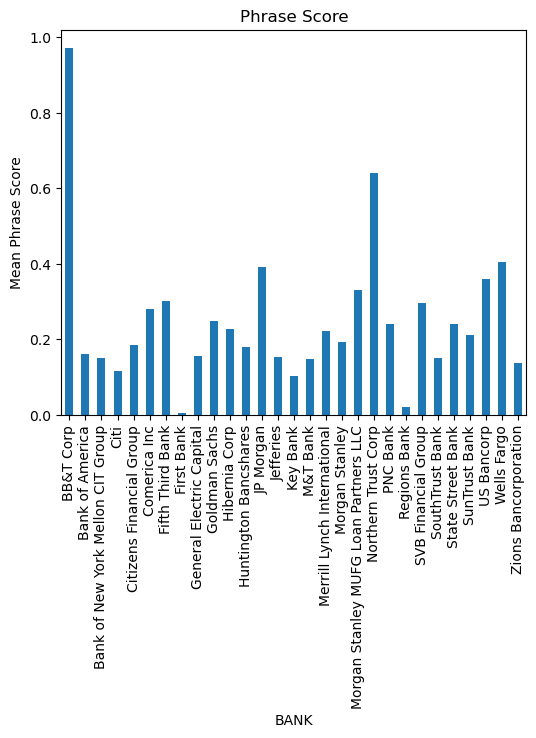

In [70]:
#generate mean of sentiment_score by period
dfg = article_scores_df.groupby(['BANK'])['phrase_score'].mean()
#create a bar plot
dfg.plot(kind='bar', title='Phrase Score', ylabel='Mean Phrase Score',
         xlabel='BANK', figsize=(6, 5))